In [1]:
import numpy as np
from numpy import nan as NA
import pandas as pd
import glob
import datetime as dt
import os as os
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from babel.numbers import format_currency
import datetime as dt
%matplotlib inline


In [2]:
pd.get_option('display.precision')

6

In [28]:
pd.set_option('display.max.columns', None)
pd.set_option('display.max.rows', 50)
pd.set_option('display.precision',2)

In [5]:
df = pd.read_csv(
    'sa_trade.csv', index_col=0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29650 entries, 0 to 29649
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Region        29650 non-null  object 
 1   Country Code  29650 non-null  object 
 2   Country       29650 non-null  object 
 3   Date          29650 non-null  object 
 4   Year          29650 non-null  int64  
 5   Month         29650 non-null  int64  
 6   Meat Type     29650 non-null  object 
 7   Description   29650 non-null  object 
 8   Quantity      29650 non-null  float64
 9   Value         29650 non-null  int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 2.5+ MB


In [7]:
df = df.set_axis(
    ['Region', 'Country Code',
     'Country', 'Date','Year',
      'Month', 'Meat Type',
      'Description', 'Quantity',
      'Value'], axis=1
    )

In [8]:
for col in [
            'Region', 'Country Code', 'Country', 
            'Year', 'Month', 'Meat Type', 'Description']:
    df[col] = df[col].astype('category')

In [9]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m')

In [10]:
df.head()

,Region,Country Code,Country,Date,Year,Month,Meat Type,Description,Quantity,Value
0,OCEANIA,AU,Australia,2010-01-01,2010,1,Beef Offals - Frozen,Livers,54.03,237749
1,OCEANIA,AU,Australia,2010-01-01,2010,1,Pork Offals - Frozen,"Other, Frozen",60.70,497049
2,OCEANIA,AU,Australia,2010-01-01,2010,1,Chicken,Other,45.07,367064
3,OCEANIA,AU,Australia,2010-01-01,2010,1,Chicken,"Cuts And Offal, Frozen",23.34,203859
4,AFRICA,LS,Lesotho,2010-01-01,2010,1,Chicken,"Cuts And Offal, Fresh Or Chilled",0.12,21350


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29650 entries, 0 to 29649
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Region        29650 non-null  category      
 1   Country Code  29650 non-null  category      
 2   Country       29650 non-null  category      
 3   Date          29650 non-null  datetime64[ns]
 4   Year          29650 non-null  category      
 5   Month         29650 non-null  category      
 6   Meat Type     29650 non-null  category      
 7   Description   29650 non-null  category      
 8   Quantity      29650 non-null  float64       
 9   Value         29650 non-null  int64         
dtypes: category(7), datetime64[ns](1), float64(1), int64(1)
memory usage: 1.1 MB


Ok, now we can start looking for some answers in the dataset.
1.	What are South Africa’s overall import trends in recent years?
    
    a. 	In prices and volume?
    
    b.  Has it gone up?
    
    c.	How much and how many?


2.	What are the main imported goods in quantity and value?
    
    a.	What price?
    
    b.	What quantity?
    
    c.	Has it changed over the years?
    
    d.	What is the trend?


3.	What are the main exporting countries?
    
    a.	What do they export?
    
    b.	What price?
    
    c.	Has this list changed over the years? 
    
    d.	What is the trend?



In [12]:
df.groupby('Year').agg({'Value': 'sum','Quantity':'sum'}).sort_index()

,Value,Quantity
Year,,
2010,3605292250,368196.84
2011,5077316483,466837.24
2012,6113675639,520974.81
2013,6163843515,496616.01
2014,6111269854,482799.05
2015,7041306185,583457.78
2016,7801591499,655144.08
2017,9008130461,666577.22
2018,9134609207,688271.82


In terms of value, we can observe that imports had been increasing until 2018, when it reached around $9.1bi. After that, it started to decline. as we don't have all import values from 2021, we cannot compare its result with other years. However, given that we have data well until September, it is likely that 2021 will end with a higher value than 2020. 
In terms of quantity, data displays interesting trends. First, in some years, while total import values were increasing, total quantity actually decreased. This happened in 2013 and 2014. We can infer that South Africa changed its meat profile, maybe buying more expensive goods. Overall, demand peaked in 2018 as well, with  688,271.82t

In [13]:
df.groupby('Date')[['Quantity','Value']].count()

,Quantity,Value
Date,,
2010-01-01,141,141
2010-02-01,147,147
2010-03-01,174,174
2010-04-01,151,151
2010-05-01,155,155
...,...,...
2021-06-01,194,194
2021-07-01,205,205
2021-08-01,214,214


In [14]:
df.groupby(['Year', 'Date'])['Value'].count()

Year  Date      
2010  2010-01-01    141
      2010-02-01    147
      2010-03-01    174
      2010-04-01    151
      2010-05-01    155
                   ... 
2021  2021-06-01    194
      2021-07-01    205
      2021-08-01    214
      2021-09-01    193
      2021-10-01    188
Name: Value, Length: 1704, dtype: int64

In [34]:
avg_imp = df.groupby(
    ['Year', 'Month'])[['Value', 'Quantity']].sum().sort_index().rename_axis(['Year', 'Month']
        )

In [35]:
avg_imp = avg_imp.sort_index(level=['Year', 'Month'])

In [36]:
avg_imp

Value  Quantity
Year Month                     
2010 1      213491699  24509.39
     2      369691255  28169.21
     3      366320313  38570.85
     4      295998630  26167.71
     5      276128201  27279.54
...               ...       ...
2021 8      737528857  44605.23
     9      653737902  40492.18
     10     698801982  41927.30
     11             0      0.00
     12             0      0.00

[144 rows x 2 columns]

In [29]:
avg_imp.loc[2010 : 2013]

Value  Quantity
Year Month                     
2010 1      213491699  24509.39
     2      369691255  28169.21
     3      366320313  38570.85
     4      295998630  26167.71
     5      276128201  27279.54
     6      359969080  36467.29
     7      324644741  33966.92
     8      262248435  28625.22
     9      243684078  28376.17
     10     262918964  30771.69
     11     274076709  30038.96
     12     356120145  35253.90
2011 1      273119192  33292.65
     2      280117970  29394.98
     3      402866471  38637.04
     4      393294789  36034.38
     5      407741234  39394.22
     6      443525779  42255.28
     7      528920545  47376.16
     8      433289957  42489.28
     9      378474679  35038.46
     10     467080731  40709.41
     11     567188670  43098.38
     12     501696466  39117.02
2012 1      502566534  43807.99
     2      550963207  45292.90
     3      575840630  47863.47
     4      570485315  51016.16
     5      536404688  47026.35
     6      419669904  37018.74
     7      325101326  29117.98
     8      372370345  34095.43
     9      429132047  40437.07
     10     669944850  57091.10
     11     653709544  50067.88
     12     507487249  38139.75
2013 1      429609340  36242.39
     2      392916595  34266.29
     3      559607601  44843.61
     4      613062187  49128.92
     5      667088624  52813.68
     6      661656844  47602.82
     7      469574471  36407.34
     8      412525030  34619.20
     9      524675411  43154.77
     10     422586700  34968.90
     11     587888280  44776.11
     12     422652432  37791.98

In [52]:
df.loc[df.groupby('Year')['Value'].idxmax()]

,Region,Country Code,Country,Date,Year,Month,Meat Type,Description,Quantity,Value
170,AFRICA,NAM,Namibia,2010-02-01,2010,2,Beef - Frozen,Boneless,229.89,91911846
4343,AMERICA,BR,Brazil,2011-12-01,2011,12,Chicken,Mechanically deboned meat,9423.34,46232496
7145,AMERICA,BR,Brazil,2012-11-01,2012,11,Chicken,Other,4023.44,56493358
4825,EUROPE,GB,United Kingdom,2013-11-01,2013,11,Chicken,Other,4830.35,73755294
10564,EUROPE,NL,Netherlands,2014-05-01,2014,5,Chicken,Other,5631.13,87305550
10454,EUROPE,NL,Netherlands,2015-09-01,2015,9,Chicken,Leg quarters,5843.26,85340554
15960,EUROPE,NL,Netherlands,2016-11-01,2016,11,Chicken,Leg quarters,5134.15,77444175
17917,AMERICA,BR,Brazil,2017-07-01,2017,7,Chicken,Mechanically deboned meat,15411.18,121310429
22984,AMERICA,BR,Brazil,2018-08-01,2018,8,Chicken,Leg quarters,8431.41,117873924
19307,AMERICA,BR,Brazil,2019-05-01,2019,5,Chicken,Mechanically deboned meat,14234.43,107459170


In [154]:
df1 = df.groupby(
    ['Year', 'Month'])['Value'].sum()

In [142]:
df1

Year  Month
2010  1        213491699
      2        369691255
      3        366320313
      4        295998630
      5        276128201
                 ...    
2021  8        737528857
      9        653737902
      10       698801982
      11               0
      12               0
Name: Value, Length: 144, dtype: int64

In [143]:
max_value = df1.loc[df1.groupby('Year').idxmax()]

In [144]:
max_value

Year  Month
2010  2        369691255
2011  11       567188670
2012  10       669944850
2013  5        667088624
2014  6        644313803
2015  6        719497035
2016  6        802883492
2017  3        918285298
2018  8        992228360
2019  6        841617651
2020  10       694801226
2021  3        745598809
Name: Value, dtype: int64

<AxesSubplot:xlabel='Year,Month'>

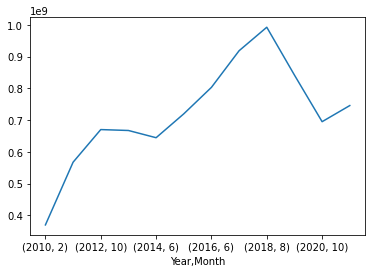

In [189]:
max_value.plot()

In [145]:
min_value = df1.loc[df1.groupby('Year').idxmin()]

In [146]:
min_value

Year  Month
2010  1        213491699
2011  1        273119192
2012  7        325101326
2013  2        392916595
2014  2        325896736
2015  1        423592963
2016  2        456472048
2017  1        524076314
2018  12       597918297
2019  9        582911459
2020  6        432213923
2021  11               0
Name: Value, dtype: int64

<AxesSubplot:xlabel='Year,Month'>

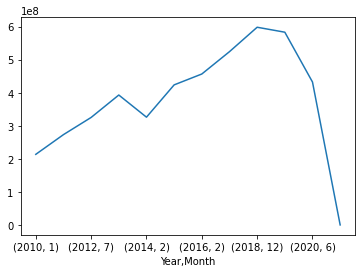

In [188]:
min_value.plot()

In [147]:
df2 = df.groupby(
    ['Year', 'Month'])['Quantity'].sum()

In [149]:
max_qty = df2.loc[df2.groupby('Year').idxmax()]

In [150]:
max_qty

Year  Month
2010  3        38570.85
2011  7        47376.16
2012  10       57091.10
2013  5        52813.68
2014  6        49342.72
2015  7        58972.38
2016  3        66765.79
2017  3        76022.62
2018  8        72664.80
2019  6        64843.27
2020  9        54661.38
2021  3        56599.08
Name: Quantity, dtype: float64

<AxesSubplot:xlabel='Year,Month'>

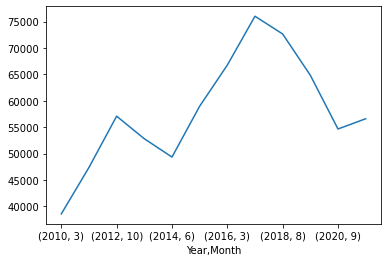

In [161]:
max_qty.plot()

<AxesSubplot:xlabel='Year,Month'>

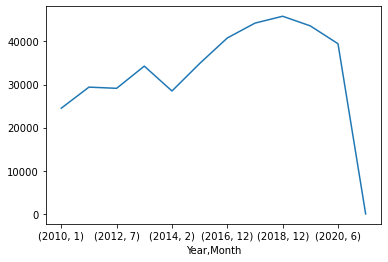

In [162]:
min_qty.plot()

In [151]:
min_qty = df2.loc[df2.groupby('Year').idxmin()]

In [152]:
min_qty

Year  Month
2010  1        24509.39
2011  2        29394.98
2012  7        29117.98
2013  2        34266.29
2014  2        28495.04
2015  1        34863.51
2016  12       40789.66
2017  1        44234.51
2018  12       45827.13
2019  9        43590.57
2020  6        39458.95
2021  11           0.00
Name: Quantity, dtype: float64

In [187]:
df[(df['Year'] == 2021) & (df['Quantity'] == 0.00)] 

,Region,Country Code,Country,Date,Year,Month,Meat Type,Description,Quantity,Value
25254,AFRICA,SZ,Eswatini,2021-07-01,2021,7,Beef - Frozen,Carcasses,0.0,100
25563,AFRICA,ZA,South Africa,2021-08-01,2021,8,Beef - Frozen,Other,0.0,720
25672,AMERICA,US,United States,2021-08-01,2021,8,Pork,Rib,0.0,165
26498,ASIA,JP,Japan,2021-05-01,2021,5,Pork,Rib,0.0,92
26792,AFRICA,SZ,Eswatini,2021-05-01,2021,5,Sheep/Goat,Carcasses,0.0,100
26847,AMERICA,US,United States,2021-01-01,2021,1,Chicken,"Not Cut In Pieces, Fresh Or Chilled",0.0,89
27027,AMERICA,US,United States,2021-02-01,2021,2,Chicken,"Not Cut In Pieces, Fresh Or Chilled",0.0,237
27032,AMERICA,US,United States,2021-02-01,2021,2,Beef - Frozen,Carcasses,0.0,631
27049,AFRICA,SZ,Eswatini,2021-06-01,2021,6,Beef - Frozen,Wagyu beef,0.0,100
27861,AMERICA,US,United States,2021-07-01,2021,7,Chicken,"Not Cut In Pieces, Fresh Or Chilled",0.0,203


In [105]:
df2['Value'] = df['Value'].idxmax(axis=1)

ValueError: `axis` must be fewer than the number of dimensions (1)

In [104]:
df2

Year
2010      (2010, 2)
2011     (2011, 11)
2012     (2012, 10)
2013      (2013, 5)
2014      (2014, 6)
2015      (2015, 6)
2016      (2016, 6)
2017      (2017, 3)
2018      (2018, 8)
2019      (2019, 6)
2020     (2020, 10)
2021      (2021, 3)
Value         25348
Name: Value, dtype: object

In [30]:
avg_imp.groupby(['Year', 'Month']).apply(lambda x: x.max())

Value  Quantity
Year Month                    
2010 1      2.13e+08  24509.39
     2      3.70e+08  28169.21
     3      3.66e+08  38570.85
     4      2.96e+08  26167.71
     5      2.76e+08  27279.54
...              ...       ...
2021 8      7.38e+08  44605.23
     9      6.54e+08  40492.18
     10     6.99e+08  41927.30
     11     0.00e+00      0.00
     12     0.00e+00      0.00

[144 rows x 2 columns]

In [233]:
avg_imp["Value"].describe().apply(lambda x: format(x, 'f'))

count          142.000000
mean     576353492.197183
std      163155199.648797
min      213491699.000000
25%      456934899.250000
50%      580991559.500000
75%      697801793.000000
max      992228360.000000
Name: Value, dtype: object

In [229]:
avg_imp.loc[2020].sum()

Value       6.96e+09
Quantity    5.70e+05
dtype: float64

In [133]:
mpl.style.use(['ggplot'])

In [152]:
imports = df.groupby('Year')['Value'].sum().sort_index()
imports.head(10)

Year
2010    3605292250
2011    5077316483
2012    6113675639
2013    6163843515
2014    6111269854
2015    7041306185
2016    7801591499
2017    9008130461
2018    9134609207
2019    8451869934
Name: Value, dtype: int64

<AxesSubplot:xlabel='Year'>

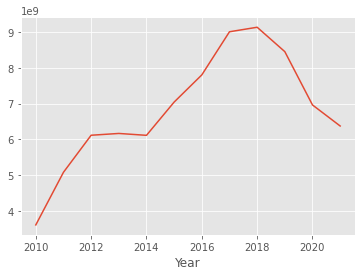

In [139]:
imports.plot()

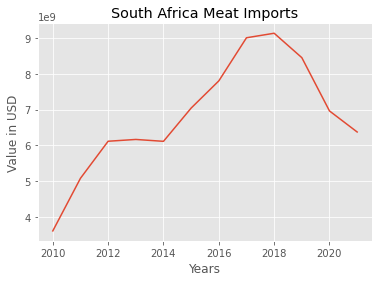

In [107]:
imports.plot(kind='line')

plt.title('South Africa Meat Imports', pad=6.0, fontdict={'color':'k'})
plt.ylabel('Value in USD', labelpad=4.0)
plt.xlabel('Years', labelpad=4.0)
plt.show()

As we can see, imports had been increased from 2014 until 2018. After that, we can notice a declining trend that has not changed since then. Now, although we cannot flag precisely determine the reasons for this current dent on imports, it has certainly coincided with political events. In February 2018, president Jacob Zuma resigned, and, since then, the country's political profile has been deteriorating. Let's annotate this event in the plot.

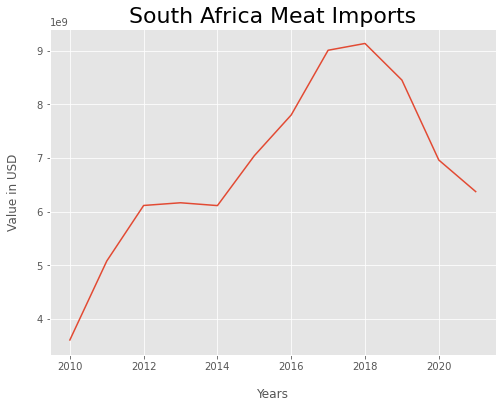

In [108]:
imports.plot(kind='line', figsize=(8,6))

plt.ylabel('Value in USD', labelpad=16)
plt.xlabel('Years', labelpad=16)
plt.title('South Africa Meat Imports', 
          fontdict={'color':'k', 'fontsize':22})

plt.ScalarFormatter(useOffset=False)

plt.show()

In [155]:
years = list(map(str, range(2010, 2022)))
years

['2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021']

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29650 entries, 0 to 29649
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Region        29650 non-null  category
 1   Country Code  29650 non-null  category
 2   Country       29650 non-null  category
 3   Year          29650 non-null  string  
 4   Date          29650 non-null  object  
 5   Meat Type     29650 non-null  category
 6   Description   29650 non-null  category
 7   Quantity      29650 non-null  float64 
 8   Value         29650 non-null  int64   
dtypes: category(5), float64(1), int64(1), object(1), string(1)
memory usage: 2.3+ MB


In [162]:
df['Region'].value_counts()

EUROPE                12659
AMERICA                8250
AFRICA                 4671
OCEANIA                3386
ASIA                    666
OTHER UNCLASSIFIED       18
Name: Region, dtype: int64

In [156]:
df['Year'] = df['Year'].astype('string')

In [197]:
europe = europe.groupby('Year')['Value'].sum().sort_index()
europe.head(10)

Year
2010     491135353
2011    1323459699
2012    2088898330
2013    2425453803
2014    3101269425
2015    3600607372
2016    4423749442
2017    2297570382
2018    2203786898
2019    2746352574
Name: Value, dtype: int64

In [195]:
europe = df.loc[df['Region'] == 'EUROPE']
europe = europe[['Value', 'Year']]

<AxesSubplot:xlabel='Year'>

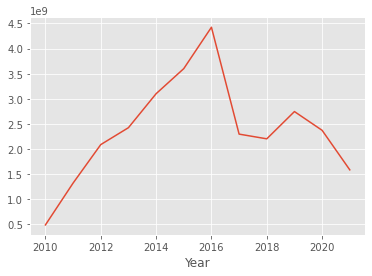

In [198]:
europe.plot()

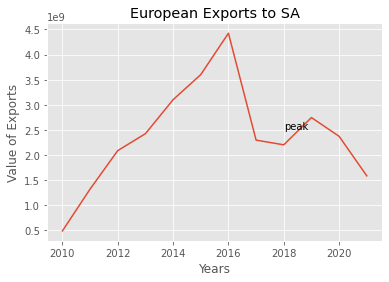

In [203]:
europe.index = europe.index.map(int)
europe.plot(kind='line')

plt.title('European Exports to SA')
plt.ylabel('Value of Exports')
plt.xlabel('Years')

plt.text(2018, 2.51e9, 'peak') # see note below

plt.show()